In [57]:
import sys
sys.path.append('..')

import qgt
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# First let's produce a transformation matrix for 4 different frequencies to the Hawking effect

# We will use the following parameters

TH = 1.0 # Hawking temperature
omegas = [0.25, 0.5, 1.0, 2.0] # Frequencies of the outgoing modes relative to the Hawking temperature
N = 4 # Number of frequencies
gamma = 0.99 # Greybody factor
theta = np.arccos(np.sqrt(gamma)) # Angle of the greybody factor

S = [np.zeros((6,6)), np.zeros((6,6)), np.zeros((6,6)), np.zeros((6,6))]


for i in range(N):
    S[i][0][0] = 1.0 * (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][0][5] = np.exp(-omegas[i]/(2*TH)) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][1][1] = 1.0 *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][1][4] = np.exp(-omegas[i]/(2*TH)) *  (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][2][4] = -np.sin(theta) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][2][2] = np.cos(theta)
    S[i][2][1] = -np.sin(theta)*np.exp(-omegas[i]/(2*TH)) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][3][5] = -np.sin(theta) *  (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][3][3] = np.cos(theta)
    S[i][3][0] = -np.sin(theta)*np.exp(-omegas[i]/(2*TH)) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][4][4] = np.cos(theta) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][4][2] = np.sin(theta)
    S[i][4][1] = np.cos(theta)*np.exp(-omegas[i]/(2*TH)) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][5][5] = np.cos(theta) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))
    S[i][5][3] = np.sin(theta)
    S[i][5][0] = np.cos(theta)*np.exp(-omegas[i]/(2*TH)) *   (1/np.sqrt(1-np.exp(-omegas[i]/TH)))

# Now that we have the individual transformation matrices, we can combine them into a single one by direct sum
S = np.block([[S[0], np.zeros((6,6)), np.zeros((6,6)), np.zeros((6,6))],
              [np.zeros((6,6)), S[1], np.zeros((6,6)), np.zeros((6,6))],
              [np.zeros((6,6)), np.zeros((6,6)), S[2], np.zeros((6,6))],
              [np.zeros((6,6)), np.zeros((6,6)), np.zeros((6,6)), S[3]]])

# Now we check that the transformation matrix is symplectic (in terms of Bogoliubov coefficients is equivalent to fulfilling the Bogoliubov relations)

qgt.Is_Sympletic(S, 1)


True

In [59]:
# Once we have the transformation matrix we can change the basis and apply to a vacuum input state to obtain the state of the outgoing modes

# change the basis
S = qgt.BasisChange(S, 1)

# create the input state
InState = qgt.Gaussian_state("vacuum", 3*N)

# apply the transformation matrix (d is the displacement which we set to 0 for the transformation)
d = np.array([0 for i in range(6*N)])
d = np.reshape(d, (6*N,1))

InState.apply_unitary(S,d)

In [60]:
# Now we can compute the Logarithmic negativity between different combinations of 2 modes

LogNeg = InState.logarithmic_negativity([0],[2])
print("Logarithmic negativity between modes 0 and 2: ", LogNeg) #Int1 vs Out1


LogNeg = InState.logarithmic_negativity([0],[3])
print("Logarithmic negativity between modes 0 and 3: ", LogNeg) #Int1 vs Int1

LogNeg = InState.logarithmic_negativity([0],[5])
print("Logarithmic negativity between modes 0 and 5: ", LogNeg) #Int1 vs Out2

Logarithmic negativity between modes 0 and 2:  3.8969237709166125
Logarithmic negativity between modes 0 and 3:  0.0
Logarithmic negativity between modes 0 and 5:  0.0


In [61]:
# Compute logarithmic negativity between one mode and the rest

mode = 0
rest = [i for i in range(3*N) if i != mode]

LogNeg = InState.logarithmic_negativity([mode],rest)
print("Logarithmic negativity between mode ", mode, " and the rest: ", LogNeg)

LogNeg = InState.logarithmic_negativity([mode],[mode+1, mode+2])
print("Logarithmic negativity between mode ", mode, " and modes ", mode+1, " and ", mode+2, ": ", LogNeg)

mode = 1
rest = [i for i in range(3*N) if i != mode]
LogNeg = InState.logarithmic_negativity([mode],rest)
print("Logarithmic negativity between mode ", mode, " and the rest: ", LogNeg)

Logarithmic negativity between mode  0  and the rest:  4.001876798863331
Logarithmic negativity between mode  0  and modes  1  and  2 :  4.00187679886333
Logarithmic negativity between mode  1  and the rest:  0.5382818777223073


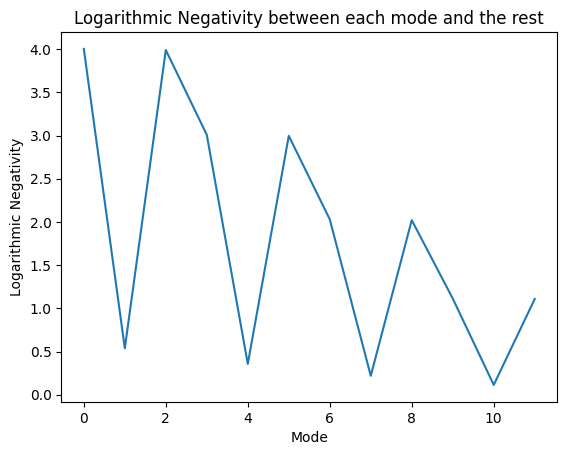

In [62]:
# Plot for all modes the Logarithmic Negativity between the mode and the rest

LogNeg = []
for mode in range(InState.N_modes):
    rest = [i for i in range(InState.N_modes) if i != mode]
    LogNeg.append(InState.logarithmic_negativity([mode],rest))

plt.plot(range(InState.N_modes), LogNeg)
plt.xlabel('Mode')
plt.ylabel('Logarithmic Negativity')
plt.title('Logarithmic Negativity between each mode and the rest')

plt.show()



In [63]:
# Define the mean LogNeg per mode

def mean_logneg(InState):
    mean = 0
    for i in range(InState.N_modes):
        rest = [j for j in range(3*N) if j != i]
        mean += InState.logarithmic_negativity([i],rest)
    return mean/(InState.N_modes)

mean = mean_logneg(InState)
print("Mean Logarithmic negativity per mode: ", mean)

Mean Logarithmic negativity per mode:  1.7913984887217795


In [71]:
# Define the same S matrix but add a lot of non interacting modes
# For that, take the previous S matrix and add with direct sum an identity matrix

nonInteractingModes = 32
SnonInteracting = np.block([[S, np.zeros((6*N, 2*nonInteractingModes))],
                            [np.zeros((2*nonInteractingModes,6*N)), np.eye(2*nonInteractingModes)]])

# Create an input state with the same number of modes as the S matrix

InStateNonInteracting = qgt.Gaussian_state("vacuum", 3*N+nonInteractingModes)

# Apply the transformation matrix

d = np.array([0 for i in range(6*N+2*nonInteractingModes)])
d = np.reshape(d, (6*N+2*nonInteractingModes,1))

InStateNonInteracting.apply_unitary(SnonInteracting,d)

# Compute the mean LogNeg per mode

mean = mean_logneg(InStateNonInteracting)
print("Mean Logarithmic negativity per mode for non interacting modes: ", mean)



Mean Logarithmic negativity per mode for non interacting modes:  0.4885632241968643


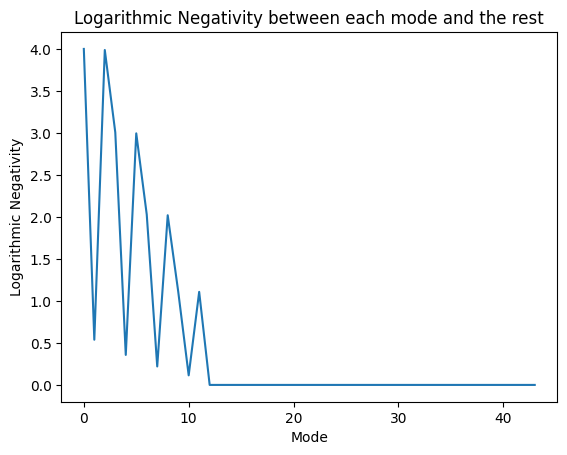

In [72]:
# Plot for all modes the Logarithmic Negativity between the mode and the rest

LogNeg = []
for mode in range(InStateNonInteracting.N_modes):
    rest = [i for i in range(InStateNonInteracting.N_modes) if i != mode]
    LogNeg.append(InStateNonInteracting.logarithmic_negativity([mode],rest))

plt.plot(range(InStateNonInteracting.N_modes), LogNeg)
plt.xlabel('Mode')
plt.ylabel('Logarithmic Negativity')
plt.title('Logarithmic Negativity between each mode and the rest')

plt.savefig('LogNegGeneralizedNonInteracting.png')
plt.show()

Current modes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Mean Logarithmic negativity per mode for non interacting modes after tracing out zero LogNeg modes:  1.7913984887217789


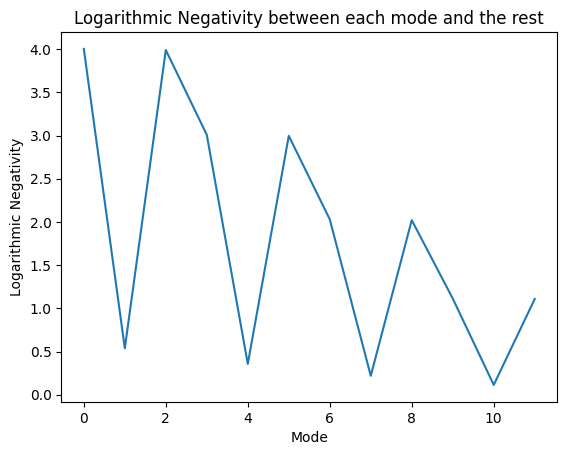

In [73]:
# Now we compute the Logarithmic Negativity between one mode and the rest
# But if it is zero we trace out the mode and go to the next one

TotalModes = [i for i in range(InStateNonInteracting.N_modes)]
CurrentModes = [i for i in range(InStateNonInteracting.N_modes)]

mode = 0
while mode < InStateNonInteracting.N_modes:
    LogNeg = 0.0
    rest = [i for i in range(InStateNonInteracting.N_modes) if i != mode]
    LogNeg = InStateNonInteracting.logarithmic_negativity([mode],rest)
    mode += 1
    if np.abs(LogNeg) < 1e-12: # Sensitivity to numerical errors
        mode -=1
        InStateNonInteracting.partial_trace([mode])
        del CurrentModes[mode]

print("Current modes: ", CurrentModes)

mean = mean_logneg(InStateNonInteracting)
print("Mean Logarithmic negativity per mode for non interacting modes after tracing out zero LogNeg modes: ", mean)

# Plot for all modes the Logarithmic Negativity between the mode and the rest

LogNeg = []
for mode in range(InStateNonInteracting.N_modes):
    rest = [i for i in range(InStateNonInteracting.N_modes) if i != mode]
    LogNeg.append(InStateNonInteracting.logarithmic_negativity([mode],rest))

plt.plot(range(InStateNonInteracting.N_modes), LogNeg)
plt.xlabel('Mode')
plt.ylabel('Logarithmic Negativity')
plt.title('Logarithmic Negativity between each mode and the rest')

plt.savefig('LogNegGeneralizedTraced.png')
plt.show()